### Как образуется прямая линейной регрессии?
1. Определяемся с моделью: $\hat{y} = \beta_0 + \beta_1 \cdot x$
2. Находим коэффициенты $\beta$ для уравнения линейной регрессии
3. Подставляем в это уравнение значения признака $x$, рассчитываем оценочные значения $y$

#### <center>Метод наименьших квадратов</center>

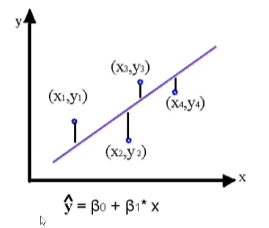

$$(y_1 - \hat{y_1})^2 + \cdots + (y_4 - \hat{y_4})^2 = min$$

### Условия применимости:
1. Наличие линейной зависимости между переменной $x$ и зависимой $y$
2. Независимость остатков
3. Для любого значения $x$ значение зависимой переменной $y$ распределено нормально
4. Гомоскедастичность

#### 1. Наличие линейной зависимости между переменной $x$ и зависимой $y$
Проверка условия: график
Как решить задачу нелинейности?

Нелинейная  трансформация 𝑥 или/и 𝑦 : 
- логарифм,
- квадратный корень
- умножение на обратное число
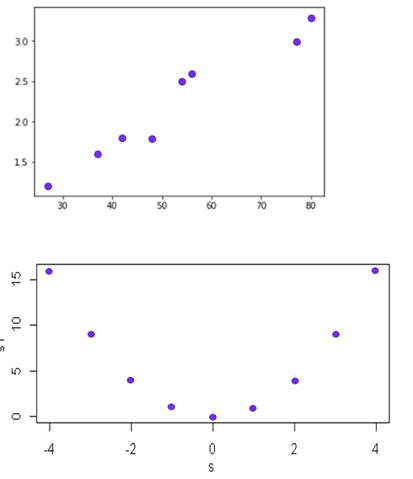


#### 2. Независимость остатков
Мы не должны видеть какого-то шаблона в поведении остатков с течением времени. Например, остатки не должны постоянно с течением времени расти.

Если точки на графике остатков разбросаны
случайно вокруг горизонтальной линии, то 
данные подходят для модели линейной регрессии.

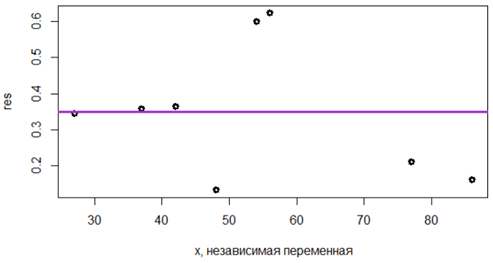

Эти два графика показывают, что для данных 
  подойдет лучше нелинейная модель. 
Решить проблему можно также
 путем трансформации данных:
 
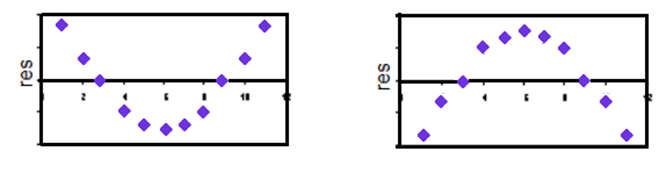

#### 3. Нормальное распределение остатков:
Распределение остатков следует нормальному распределению.

Методы проверки этого условия:
- QQ-plot
- Тест Шапиро-Уилка
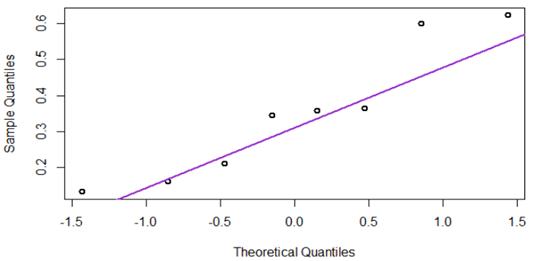

#### 4. Гомоскедастичность
Под этим свойством понимается постоянство дисперсии при всех значениях 𝑥. Т.е. стандартное отклонение σ одинаково при всех значениях 𝑥, если разброс остатков неравномерный , то говорят о присутствии гетероскедастичности.

Проверить на наличие гетероскедастичности
можно с помощью графика. 

Решить эту проблему:

- log- трансформация 𝑦 
- переопределить зависимую переменную

Примеры гетероскедастичности:

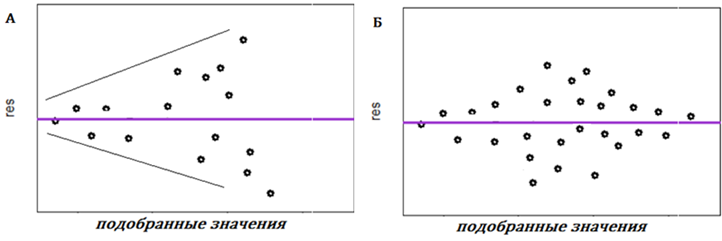

### Трансформация данных
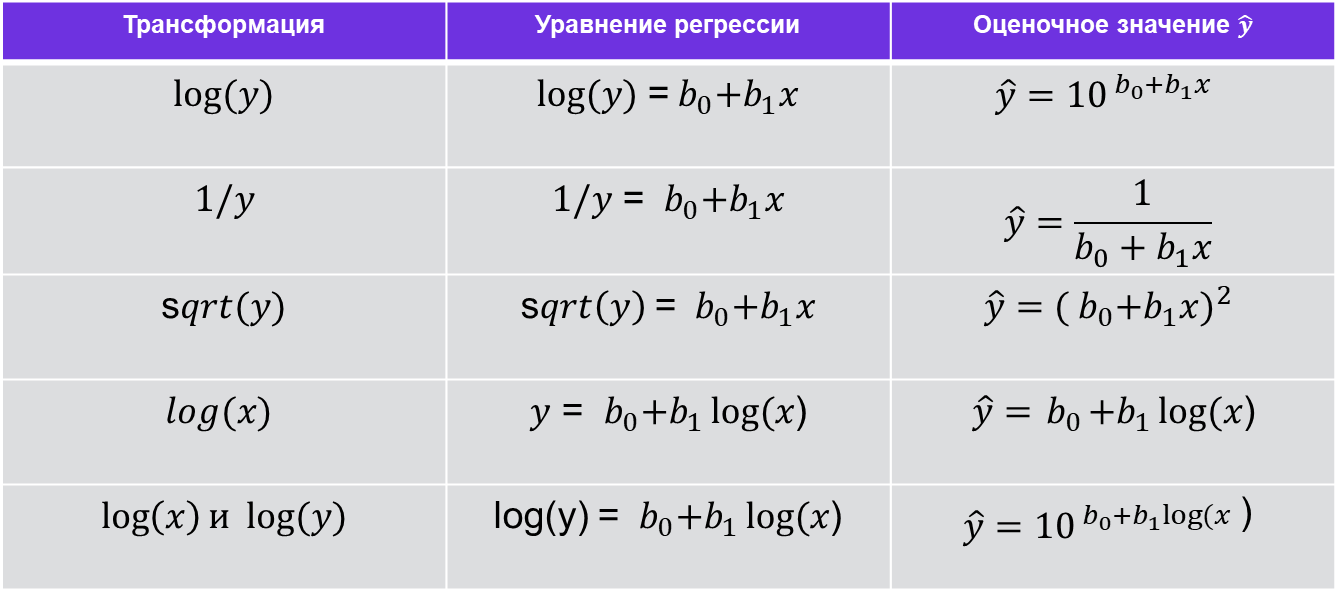

## 3 метода построения линейной регрессии
- Математические формулы
- Матричный метод
- Метод градиентного спуска

Расчет коэффициентов по формулам:
$$b = \dfrac{n\displaystyle\sum_{i=1}^n x_i y_i - \left( \displaystyle\sum_{i=1}^nx_i \right) \left( \displaystyle\sum_{i=1}^n y_i \right)}{n\displaystyle\sum_{i=1}^n x_i^2 - \left( \displaystyle\sum_{i=1}^n x_i \right) ^2}$$

$$a = \overline{y} - b \overline{x}$$

$$\overline{y} = \dfrac{\displaystyle\sum_{i=1}^n y_i}{n}$$

$$\overline{x} = \dfrac{\displaystyle\sum_{i=1}^n x_i}{n}$$


In [1]:
import numpy as np

In [2]:
s = np.array([27, 37, 42, 48, 57, 56, 77, 80])
p = np.array([1.2, 1.6, 1.8, 1.8, 2.5, 2.6, 3, 3.3])
n = len(s)
b1 = (n*np.sum(p*s) - np.sum(s) * np.sum(p))/(n* np.sum(s**2) - np.sum(s)**2)
b1

0.03874584717607981

In [3]:
# Или 2-й способ:
b1 = (np.mean(s*p) - np.mean(s)*np.mean(p))/(np.mean(s**2) - np.mean(s)**2)
b1

0.03874584717607981

In [4]:
b0 = np.mean(p) - b1*np.mean(s)
b0

0.17147009966776983

In [5]:
y_forecast = b0 + b1 * s
y_forecast

array([1.21760797, 1.60506645, 1.79879568, 2.03127076, 2.37998339,
       2.34123754, 3.15490033, 3.27113787])

### Функция потерь
Функция потерь $mse$ - мера измерения ошибок, которые функция делает на нашем наборе данных

$$mse = \frac{\sum(y - y_{pred})^2}{n}$$
$n$ - число измерений

In [6]:
mse = ((p - y_forecast)**2).sum() / n
mse

0.020001557308970096

### Матричный метод расчета коэффициентов линейной регрессии
$$\hat{y} = \beta_0 + \beta_1 x$$

$$Y = X \cdot B$$

$$\begin{pmatrix} y_1 \\ y_2 \\ y_3\end{pmatrix} = \begin{pmatrix} 1 & x_1 \\ 1 & x_2 \\ 1 & x_3 \end{pmatrix} \begin{pmatrix} \beta_0 \\ \beta_1 \end{pmatrix}$$

$$\hat{\beta} = (X^T \cdot X)^{-1} \cdot X^T \cdot Y$$

In [7]:
x = s.reshape((len(s), 1))
x

array([[27],
       [37],
       [42],
       [48],
       [57],
       [56],
       [77],
       [80]])

In [8]:
y = p.reshape((len(p),1))
y

array([[1.2],
       [1.6],
       [1.8],
       [1.8],
       [2.5],
       [2.6],
       [3. ],
       [3.3]])

In [9]:
X = np.hstack([np.ones((len(s), 1)), x])
X

array([[ 1., 27.],
       [ 1., 37.],
       [ 1., 42.],
       [ 1., 48.],
       [ 1., 57.],
       [ 1., 56.],
       [ 1., 77.],
       [ 1., 80.]])

In [10]:
B = np.dot(np.linalg.inv(np.dot(X.T, X)), X.T @ y)
B

array([[0.1714701 ],
       [0.03874585]])

### Расчет коэффициентов методом градиентного спуска для $\hat{y} = \beta_1 x$

In [56]:
def mse_(B_1, y, x, n):
    return np.sum((B_1*x - y)**2)/n

mse_(B[1], p, s, len(s))

0.049403552389045965

In [57]:
alpha = 1e-6
B1 = 0.1
n = len(s)
epsi_1 = 10**(-5)

In [58]:
for _ in range(10000):
    B1 -= alpha * (2/n) * np.sum((B1 * s - p) * s)
print('B1 = {}'.format(B1))

B1 = 0.04166800643086872


In [59]:
B1 = 0.1
for i in range(5001):
    B1 -= alpha * (2/n) * np.sum ((B1* s - p) * s)
    if i % 500 == 0:
        print(f'Iteration = {i}, B1 = {B1}, mse = {mse_(B1, p, s, n)}')

Iteration = 0, B1 = 0.09963717500000001, mse = 10.473767425934748
Iteration = 500, B1 = 0.044228497074524545, mse = 0.04323672600561466
Iteration = 1000, B1 = 0.041781102969909154, mse = 0.022886996112286277
Iteration = 1500, B1 = 0.041673001890302756, mse = 0.022847294248723928
Iteration = 2000, B1 = 0.041668227079662334, mse = 0.022847216791284503
Iteration = 2500, B1 = 0.04166801617689674, mse = 0.022847216640166798
Iteration = 3000, B1 = 0.04166800686134894, mse = 0.022847216639871944
Iteration = 3500, B1 = 0.04166800644988245, mse = 0.022847216639871385
Iteration = 4000, B1 = 0.041668006431708024, mse = 0.02284721663987139
Iteration = 4500, B1 = 0.04166800643090528, mse = 0.022847216639871402
Iteration = 5000, B1 = 0.0416680064308698, mse = 0.022847216639871396


### SKLEARN

In [15]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

In [16]:
model = LinearRegression() # задаем модель линейной регресии

In [17]:
# делаем массив s двумерным аттрибутом reshape(-1, 1)

In [18]:
x

array([[27],
       [37],
       [42],
       [48],
       [57],
       [56],
       [77],
       [80]])

In [19]:
regres = model.fit(x, p) # подбираем коэффициенты
print(regres.intercept_)

0.17147009966777427


In [20]:
print(regres.coef_) # выводим коэффициент

[0.03874585]


In [21]:
y_fc = model.predict(x) # подставим площадь в модель и посчитаем предсказанные значения цены квартиры
y_fc

array([1.21760797, 1.60506645, 1.79879568, 2.03127076, 2.37998339,
       2.34123754, 3.15490033, 3.27113787])

In [22]:
df = pd.DataFrame({'реальные': p, 'предсказанные': y_fc})
df

,реальные,предсказанные
0,1.2,1.217608
1,1.6,1.605066
2,1.8,1.798796
3,1.8,2.031271
4,2.5,2.379983
5,2.6,2.341238
6,3.0,3.154900
7,3.3,3.271138


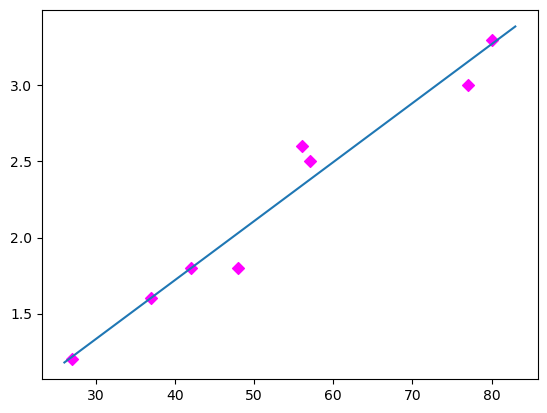

In [23]:
x_axis = np.arange(round(min(s)*0.95), round(max(s)*1.05), 1)
y_axis = model.predict(x_axis.reshape(-1, 1))
plt.plot(x_axis, y_axis)
plt.scatter(s, p, marker='D', color='magenta')

### Коэффициент детерминации $𝑹^𝟐$
Коэффициент детерминации показывает, какую долю изменчивости 𝑦 описала подобранная математическая модель. Коэффициент детерминации равен квадрату коэффициента корреляции и обозначается $𝑅^2= 𝑟^2$.

In [24]:
r = np.corrcoef(s, p) [1,0]
r

0.9785768205829909

In [25]:
r**2

0.9576125937823151

In [26]:
regres.score(x, p) # или получим из математической модели

0.9576125937823151

### Критерий Фишера
F-критерий Фишера позволяет оценить 
значимость модели линейной регрессии.

Установим уровень значимости  α = 0,05.

F-тест Фишера проверяет нулевую гипотезу о незначимости коэффициента детерминации (в данных нет зависимости):

$$F = \dfrac{R^2/m}{(1 - R^2)/(n - m - 1)}$$

где $R^2$ - коэффициент детерминации, $n$ - число наблюдений, $m$ - число факторов.

Эта статистика имеет распределение Фишера с параметрами: $k_1 = m, k_2 = n-m-1$

In [27]:
stats.f.ppf(1-0.05, 1, 6)

5.987377607273699

### Оценка значимости отдельных коэффициентов. Критерий Стьюдента
t-критерий Стьюдетнта позволяет оценить значимость отдельных коэффициентов  модели линейной   регрессии

Установим уровень значимости  α =0,05.


In [28]:
stats.t.ppf(1-0.025, 6)

2.4469118487916806

## Задача 1
Постройте графики для приведенных наборов данных. Найдите коэффициенты для линии
регрессии и коэффициенты детерминации. Что вы замечаете? Нанесите на график модель
линейной регрессии.

X1= np.array([30,30,40, 40)]<br>
Y1= np.array([37, 47, 50, 60)]<br>
x2= np.array([30,30,40, 40, 20, 20, 50, 50])<br>
y2= np.array([37, 47, 50, 60, 25, 35, 62, 72])<br>
X3 = np.array([30,30,40, 40, 20, 20, 50, 50, 10, 10, 60, 60])<br>
Y3 = np.array([37, 47, 50, 60, 25, 35, 62, 72, 13, 23, 74, 84])<br>


In [29]:
X1 = np.array([30, 30, 40, 40])
Y1 = np.array([37, 47, 50, 60])
np.corrcoef(X1, Y1)

array([[1.        , 0.79262399],
       [0.79262399, 1.        ]])

In [30]:
b1_1 = (np.mean(X1*Y1) - np.mean(X1)*np.mean(Y1))/(np.mean(X1**2) - np.mean(X1)**2)
b1_1

1.3

In [31]:
b0_1 = np.mean(Y1) - b1_1 * np.mean(X1)
b0_1

3.0

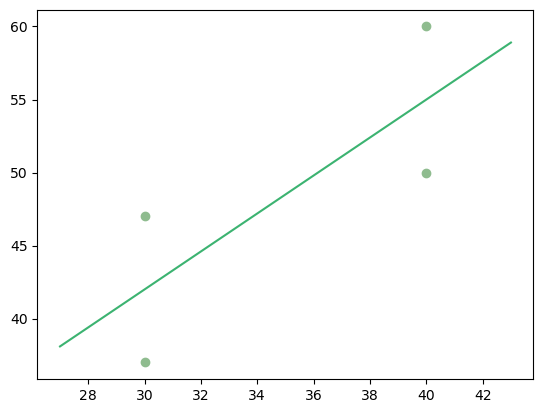

In [32]:
x_axis1 = np.arange(round(min(X1)*0.9), round(max(X1))*1.1, 1)
plt.scatter(X1, Y1, color='darkseagreen')
plt.plot(x_axis1, b0_1 + b1_1*x_axis1, color='mediumseagreen')

In [33]:
X2 = np.array([30, 30, 40, 40, 20, 20, 50, 50])
Y2 = np.array([37, 47, 50, 60, 25, 35, 62, 72])
X2_r = X2.reshape(len(X2), 1)
X2_h = np.hstack([np.ones((len(X2), 1)), X2_r])
B2 = np.dot(np.linalg.inv(np.dot(X2_h.T, X2_h)), X2_h.T @ Y2)
B2

array([5.1 , 1.24])

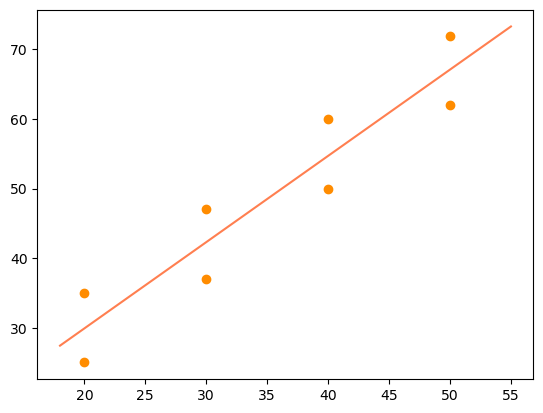

In [34]:
x_axis2 = np.arange(round(min(X2)*0.9), round(max(X2))*1.1, 1)
plt.scatter(X2, Y2, color='darkorange')
plt.plot(x_axis2, B2[0] + B2[1]*x_axis2, color='coral')

In [35]:
X3 = np.array([30, 30, 40, 40, 20, 20, 50, 50, 10, 10, 60, 60])
Y3 = np.array([37, 47, 50, 60, 25, 35, 62, 72, 13, 23, 74, 84])


In [36]:
model3 = LinearRegression()

In [37]:
X3_r = X3.reshape(-1, 1)
mod3 = model3.fit(X3_r, Y3)
mod3.intercept_


5.600000000000016

In [38]:
mod3.coef_

array([1.22571429])

In [39]:
mod3.coef_[0]

1.2257142857142853

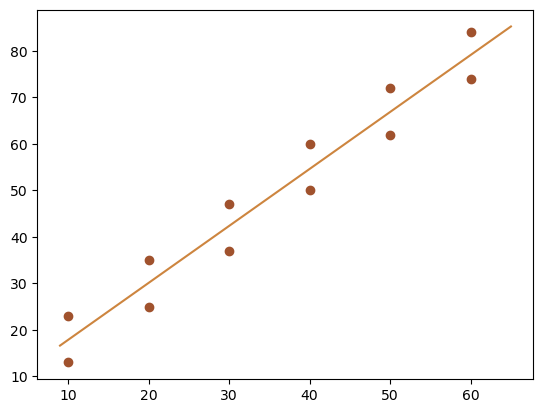

In [40]:
x_axis3 = np.arange(round(min(X3)*0.9), round(max(X3)*1.1), 1)
plt.scatter(X3, Y3, color='sienna')
plt.plot(x_axis3, mod3.intercept_ + mod3.coef_[0]*x_axis3, color='peru')

## Задача 2

In [41]:
x1 = np.array([10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5])
y1 = np.array([8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68])

In [42]:
model = LinearRegression()
x1_r = x1.reshape(-1, 1)
mod2_1 = model.fit(x1_r, y1)
mod2_1.intercept_, mod2_1.coef_[0]

(3.0000909090909103, 0.5000909090909091)

Text(0.5, 1.0, 'r = 0.816')

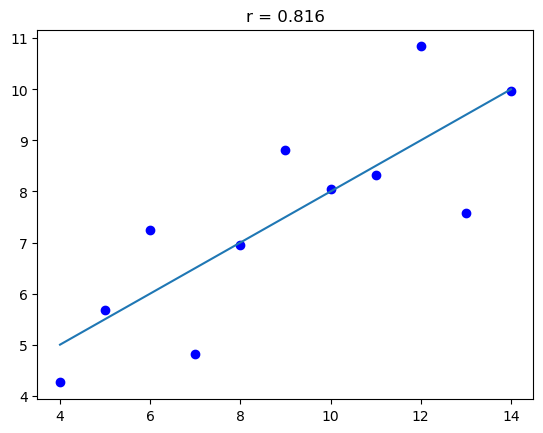

In [43]:
r = np.corrcoef(x1, y1)
x_axis2_1 = np.arange(round(min(x1)*0.9), round(max(x1)*1.1), 1)
plt.scatter(x1, y1, color='blue')
plt.plot(x_axis2_1, mod2_1.intercept_ + mod2_1.coef_[0]*x_axis2_1)
plt.title(f"r = {round(r[0][1], 3)}")

In [44]:
mod2_1.score(x1_r, y1)

0.666542459508775

In [45]:
y1_fc = mod2_1.intercept_ + mod2_1.coef_[0]*x1
y1_fc

array([ 8.001     ,  7.00081818,  9.50127273,  7.50090909,  8.50109091,
       10.00136364,  6.00063636,  5.00045455,  9.00118182,  6.50072727,
        5.50054545])

In [46]:
res1 = y1 - y1_fc
res1

array([ 0.039     , -0.05081818, -1.92127273,  1.30909091, -0.17109091,
       -0.04136364,  1.23936364, -0.74045455,  1.83881818, -1.68072727,
        0.17945455])

In [47]:
stats.shapiro(res1)

ShapiroResult(statistic=0.9421076774597168, pvalue=0.5455849170684814)

Принимаем нулевую гипотезу о том, что наши остатки имеют нормальное распределение.

In [48]:
# гомоскедастичность

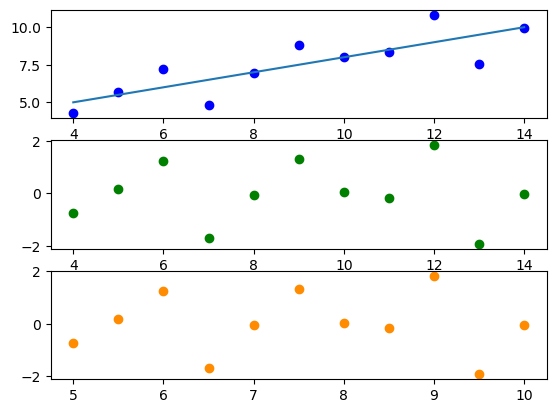

In [49]:
fig, axis = plt.subplots(3, 1)
# plt.title(f"r = {round(r[0][1], 3)}")
axis[0].scatter(x1, y1, color='blue')
axis[0].plot(x_axis2_1, mod2_1.intercept_ + mod2_1.coef_[0]*x_axis2_1)

axis[1].scatter(x1, res1, color='green')
axis[2].scatter(y1_fc, res1, color='darkorange')



На последнем графике дисперсия в целом постоянна (отклонение всегда примерно одно и то же). Гомоскедастичность остатков присутствует.

## Задача 5 Критерий Фишера
Оценим значимость полученной модели

In [50]:
n5 = x1.shape[0]
n5

11

In [51]:
m5 = 1
k1 = m5
k2 = n5 - m5 - 1

k1, k2

(1, 9)

In [52]:
alpha = 0.05
t = stats.f.ppf(1 - alpha, k1, k2)
t

5.117355029199227

In [53]:
R2 = r[0][1]**2
F = (R2 / k1) / ((1 - R2) / k2)
F

17.989942967676996

Нулевая гипотеза (о том, что коэффициенты не имеют значения, или иными словами $R^2 = 0$) отвергается. Значит, найденные коэффициенты имеют значение.

Так как статистика ($t = 5.117$) меньше, чем критическое значение ($F = 18.0$)

In [54]:
import statsmodels.api as sm
x1 = sm.add_constant(x1)
model = sm.OLS(y1, x1)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.667
Model:                            OLS   Adj. R-squared:                  0.629
Method:                 Least Squares   F-statistic:                     17.99
Date:                Tue, 28 Mar 2023   Prob (F-statistic):            0.00217
Time:                        10:28:05   Log-Likelihood:                -16.841
No. Observations:                  11   AIC:                             37.68
Df Residuals:                       9   BIC:                             38.48
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.0001      1.125      2.667      0.0

C:\Users\natal\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1769: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
